In [1]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd

stocks = ['OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
names = ['Oxy', 'BP', 'ExxonMobil', 'EOG Resources', 'Total', 'Devon Energy', 'Shell', 'Equinor', 'ConocoPhillips', 'Oil Futures']


In [2]:
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2020,12,31)
data = yf.download('CVX', start=start, end=end, group_by = 'ticker')
cvx_df = data.reset_index()
cvx_df['Ticker'] = 'CVX'
cvx_df['Company'] = 'Chevron'



[*********************100%***********************]  1 of 1 completed


In [3]:
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2020,12,31)
data = yf.download('CL=F', start=start, end=end, group_by = 'ticker')
oil_df = data.reset_index()
oil_df['Ticker'] = 'CL=F'
oil_df['Company'] = 'Future Oil'



[*********************100%***********************]  1 of 1 completed


/Users/bulu/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


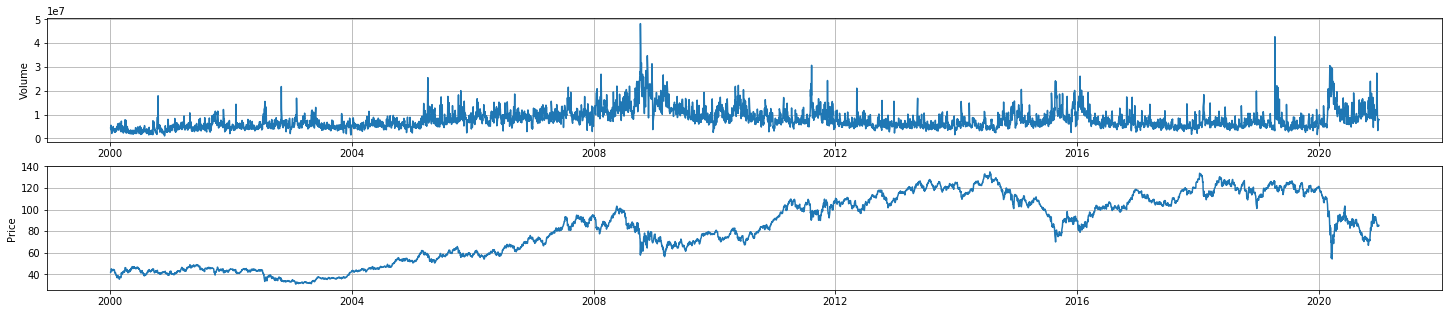

In [4]:
fig, axs = plt.subplots(2, figsize=(25,5))
#plt.subplots(figsize=(10,5))
axs[0].plot(cvx_df['Date'], cvx_df['Volume'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(cvx_df['Date'], cvx_df['Close'])
axs[1].grid()
axs[1].set_ylabel('Price')
plt.show()

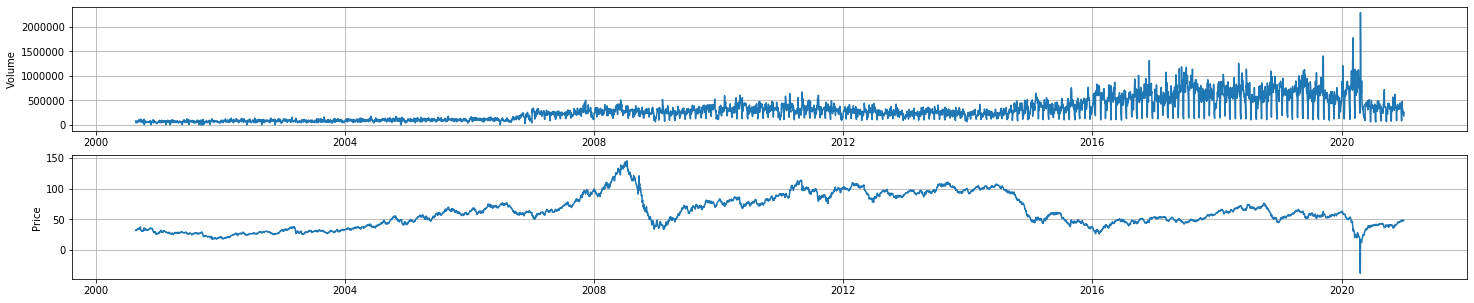

In [5]:
fig, axs = plt.subplots(2, figsize=(25,5))
#plt.subplots(figsize=(10,5))
axs[0].plot(oil_df['Date'], oil_df['Volume'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(oil_df['Date'], oil_df['Close'])
axs[1].grid()
axs[1].set_ylabel('Price')
plt.show()

In [6]:
ratio_open = []
for i,j in zip(cvx_df['Open'],oil_df['Open']):
    ratio_open.append(i/j) 

In [7]:
ratio_close = []
for i,j in zip(cvx_df['Close'],oil_df['Close']):
    ratio_close.append(i/j) 

In [8]:
oil_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Company
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385,CL=F,Future Oil
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978,CL=F,Future Oil
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601,CL=F,Future Oil
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770,CL=F,Future Oil
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131,CL=F,Future Oil
...,...,...,...,...,...,...,...,...,...
5075,2020-12-23,46.790001,48.500000,46.160000,48.119999,48.119999,344306,CL=F,Future Oil
5076,2020-12-28,48.230000,48.959999,47.500000,47.619999,47.619999,238462,CL=F,Future Oil
5077,2020-12-29,47.720001,48.349998,47.680000,48.000000,48.000000,213778,CL=F,Future Oil
5078,2020-12-30,48.130001,48.660000,47.610001,48.400002,48.400002,266957,CL=F,Future Oil


In [9]:
cvx_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Company
0,2000-01-03,42.937500,42.937500,41.281250,41.812500,19.360474,4387600,CVX,Chevron
1,2000-01-04,41.468750,42.062500,41.250000,41.812500,19.360474,3702400,CVX,Chevron
2,2000-01-05,41.531250,43.281250,41.531250,42.562500,19.707745,5567600,CVX,Chevron
3,2000-01-06,42.656250,44.593750,42.656250,44.375000,20.546988,4353400,CVX,Chevron
4,2000-01-07,45.000000,45.437500,44.500000,45.156250,20.908724,4487400,CVX,Chevron
...,...,...,...,...,...,...,...,...,...
5278,2020-12-23,85.000000,86.660004,85.000000,85.690002,84.495621,7223100,CVX,Chevron
5279,2020-12-24,85.930000,85.930000,84.809998,85.330002,84.140633,3335600,CVX,Chevron
5280,2020-12-28,85.610001,86.629997,84.620003,84.900002,83.716629,8051900,CVX,Chevron
5281,2020-12-29,85.260002,85.720001,84.050003,84.610001,83.430672,7670800,CVX,Chevron


In [10]:
merge_df = oil_df

In [11]:
merge_df = pd.merge(left =oil_df, right=cvx_df, how='left', left_on ='Date', right_on='Date')
merge_df

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Ticker_x,Company_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Ticker_y,Company_y
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385,CL=F,Future Oil,43.812500,44.843750,43.593750,44.437500,21.060049,4678000.0,CVX,Chevron
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978,CL=F,Future Oil,43.312500,43.468750,42.937500,43.093750,20.423210,3075600.0,CVX,Chevron
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601,CL=F,Future Oil,43.281250,43.750000,42.843750,43.437500,20.586123,2516400.0,CVX,Chevron
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770,CL=F,Future Oil,43.062500,44.031250,42.937500,43.468750,20.600927,1837600.0,CVX,Chevron
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131,CL=F,Future Oil,43.437500,43.687500,42.968750,43.000000,20.378790,1724400.0,CVX,Chevron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,2020-12-23,46.790001,48.500000,46.160000,48.119999,48.119999,344306,CL=F,Future Oil,85.000000,86.660004,85.000000,85.690002,84.495621,7223100.0,CVX,Chevron
5076,2020-12-28,48.230000,48.959999,47.500000,47.619999,47.619999,238462,CL=F,Future Oil,85.610001,86.629997,84.620003,84.900002,83.716629,8051900.0,CVX,Chevron
5077,2020-12-29,47.720001,48.349998,47.680000,48.000000,48.000000,213778,CL=F,Future Oil,85.260002,85.720001,84.050003,84.610001,83.430672,7670800.0,CVX,Chevron
5078,2020-12-30,48.130001,48.660000,47.610001,48.400002,48.400002,266957,CL=F,Future Oil,84.610001,86.580002,84.540001,85.330002,84.140633,7901800.0,CVX,Chevron


In [12]:
ratio_open = []
for i,j in zip(merge_df['Open_y'],merge_df['Open_x']):
    ratio_open.append(i/j) 

In [13]:
ratio_close = []
for i,j in zip(merge_df['Open_y'],merge_df['Open_x']):
    ratio_close.append(i/j) 

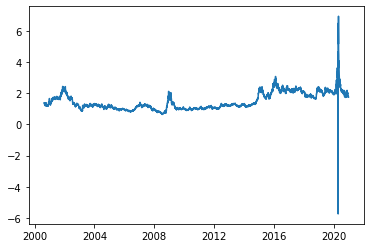

In [14]:
plt.plot(merge_df['Date'], ratio_open)
plt.show()

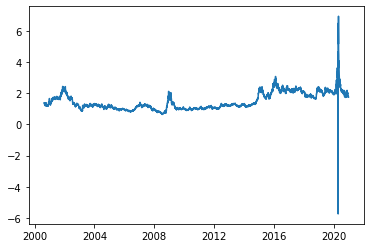

In [15]:
plt.plot(merge_df['Date'], ratio_close)
plt.show()

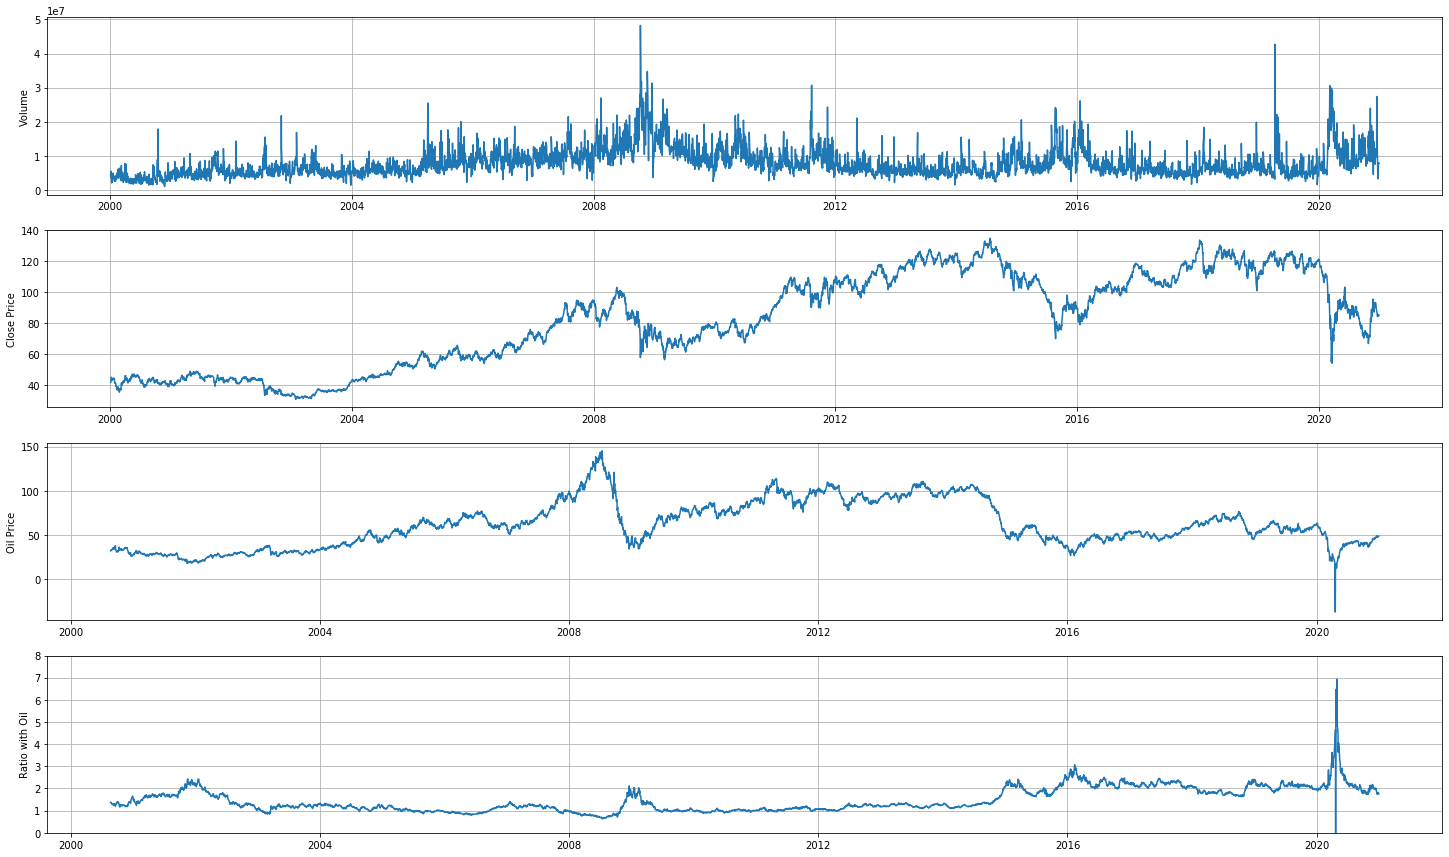

In [16]:
fig, axs = plt.subplots(4, figsize=(25,15))
#plt.subplots(figsize=(10,5))
axs[0].plot(cvx_df['Date'], cvx_df['Volume'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(cvx_df['Date'], cvx_df['Close'])
axs[1].grid()
axs[1].set_ylabel('Close Price')
axs[2].plot(oil_df['Date'], oil_df['Close'])
axs[2].grid()
axs[2].set_ylabel('Oil Price')
axs[3].plot(merge_df['Date'], ratio_close)
axs[3].grid()
axs[3].set_ylabel('Ratio with Oil')
axs[3].set_ylim([0,8])
plt.show()

In [17]:
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2020,12,31)
data = yf.download('XOM', start=start, end=end, group_by = 'ticker')
xom_df = data.reset_index()
xom_df['Ticker'] = 'XOM'
xom_df['Company'] = 'Exxon'

[*********************100%***********************]  1 of 1 completed


In [18]:
merge2_df = pd.merge(left =oil_df, right=xom_df, how='left', left_on ='Date', right_on='Date')
merge2_df

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Ticker_x,Company_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Ticker_y,Company_y
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385,CL=F,Future Oil,41.875000,42.375000,41.875000,42.250000,22.771723,9290600.0,XOM,Exxon
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978,CL=F,Future Oil,41.687500,41.687500,41.250000,41.468750,22.350643,11205000.0,XOM,Exxon
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601,CL=F,Future Oil,41.500000,41.843750,41.218750,41.468750,22.350643,6401800.0,XOM,Exxon
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770,CL=F,Future Oil,41.343750,41.906250,41.281250,41.406250,22.316950,5888000.0,XOM,Exxon
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131,CL=F,Future Oil,41.406250,41.500000,41.125000,41.257812,22.236948,6416800.0,XOM,Exxon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,2020-12-23,46.790001,48.500000,46.160000,48.119999,48.119999,344306,CL=F,Future Oil,41.509998,42.389999,41.459999,41.770000,41.072498,19085900.0,XOM,Exxon
5076,2020-12-28,48.230000,48.959999,47.500000,47.619999,47.619999,238462,CL=F,Future Oil,41.689999,42.549999,41.520000,41.740002,41.042999,23877500.0,XOM,Exxon
5077,2020-12-29,47.720001,48.349998,47.680000,48.000000,48.000000,213778,CL=F,Future Oil,42.040001,42.119999,41.200001,41.270000,40.580849,20287700.0,XOM,Exxon
5078,2020-12-30,48.130001,48.660000,47.610001,48.400002,48.400002,266957,CL=F,Future Oil,41.330002,42.419998,41.270000,41.599998,40.905334,23807300.0,XOM,Exxon


In [19]:
ratio_open = []
for i,j in zip(merge2_df['Open_y'],merge2_df['Open_x']):
    ratio_open.append(i/j) 

ratio_close = []
for i,j in zip(merge2_df['Open_y'],merge2_df['Open_x']):
    ratio_close.append(i/j) 

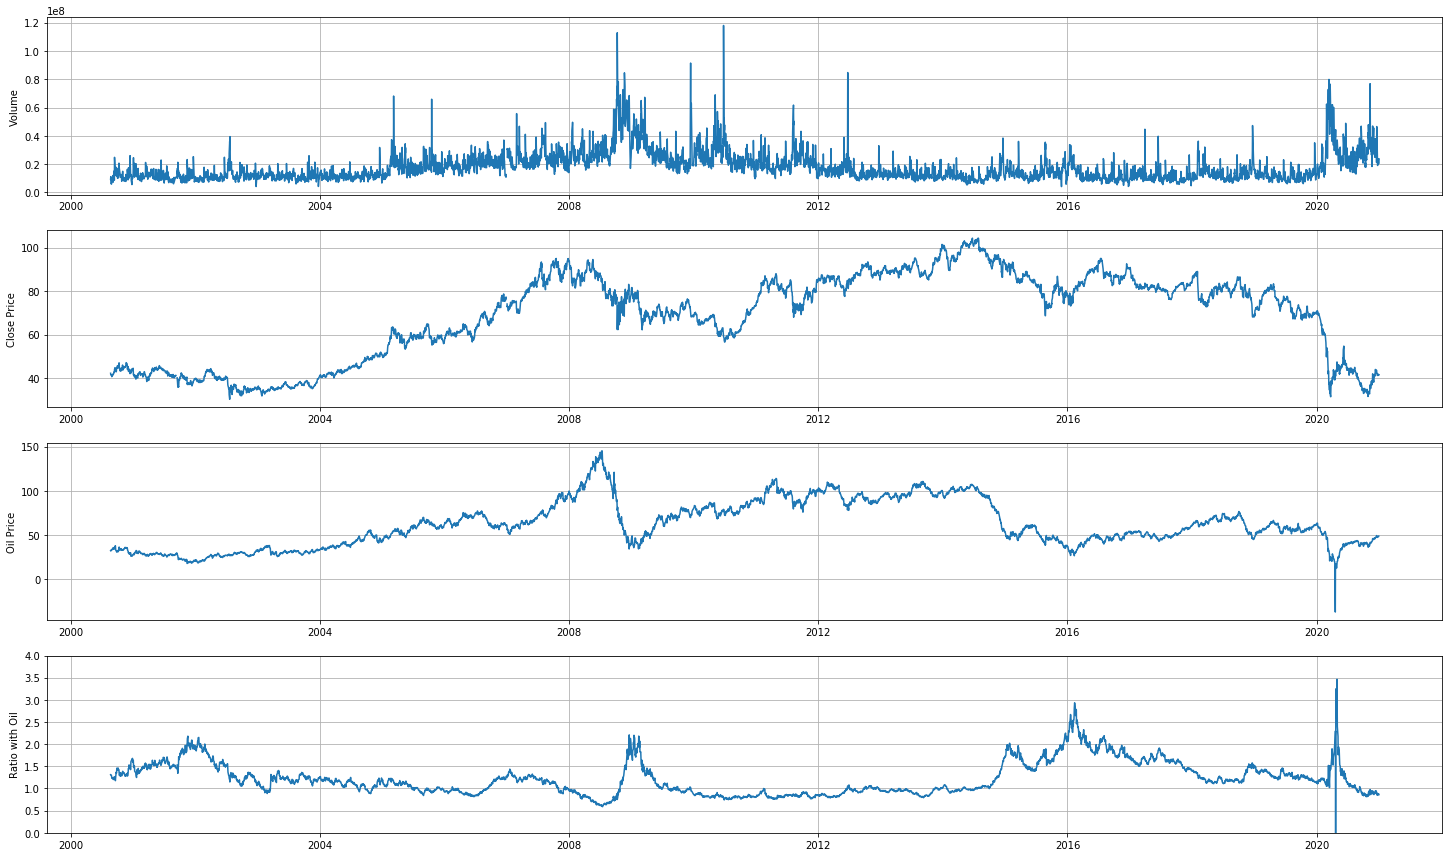

In [22]:
fig, axs = plt.subplots(4, figsize=(25,15))
#plt.subplots(figsize=(10,5))
axs[0].plot(merge2_df['Date'], merge2_df['Volume_y'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(merge2_df['Date'], merge2_df['Close_y'])
axs[1].grid()
axs[1].set_ylabel('Close Price')
axs[2].plot(merge2_df['Date'], merge2_df['Close_x'])
axs[2].grid()
axs[2].set_ylabel('Oil Price')
axs[3].plot(merge2_df['Date'], ratio_close)
axs[3].grid()
axs[3].set_ylabel('Ratio with Oil')
axs[3].set_ylim([0,4])
plt.show()